# Boston House Prices Datase

## Price Prediction using Linear Regression


Housing dataset which contains information about different houses in Boston. This data was originally a part of UCI Machine Learning Repository and has been removed now.
We can also access this data from the scikit-learn library. 
There are 506 samples and 13 feature variables in this dataset. The objective is to predict the value of prices of the house using the given features.

### Lets get started

First, we will import the required libraries


In [1]:
import pandas as  pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

Next, we will load the housing data from the scikit-learn library and understand it.

In [2]:
from sklearn.datasets import load_boston

In [3]:
bt = load_boston()

In [4]:
bt.keys()


dict_keys(['data', 'target', 'feature_names', 'DESCR', 'filename'])

data: contains the information for various houses.

target: prices of the house.

feature_names: names of the features.

DESCR: describes the dataset.

filename: location of file in your machine.

In [5]:
print(bt['DESCR'])

.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pu

In [6]:
print(bt['target'])

[24.  21.6 34.7 33.4 36.2 28.7 22.9 27.1 16.5 18.9 15.  18.9 21.7 20.4
 18.2 19.9 23.1 17.5 20.2 18.2 13.6 19.6 15.2 14.5 15.6 13.9 16.6 14.8
 18.4 21.  12.7 14.5 13.2 13.1 13.5 18.9 20.  21.  24.7 30.8 34.9 26.6
 25.3 24.7 21.2 19.3 20.  16.6 14.4 19.4 19.7 20.5 25.  23.4 18.9 35.4
 24.7 31.6 23.3 19.6 18.7 16.  22.2 25.  33.  23.5 19.4 22.  17.4 20.9
 24.2 21.7 22.8 23.4 24.1 21.4 20.  20.8 21.2 20.3 28.  23.9 24.8 22.9
 23.9 26.6 22.5 22.2 23.6 28.7 22.6 22.  22.9 25.  20.6 28.4 21.4 38.7
 43.8 33.2 27.5 26.5 18.6 19.3 20.1 19.5 19.5 20.4 19.8 19.4 21.7 22.8
 18.8 18.7 18.5 18.3 21.2 19.2 20.4 19.3 22.  20.3 20.5 17.3 18.8 21.4
 15.7 16.2 18.  14.3 19.2 19.6 23.  18.4 15.6 18.1 17.4 17.1 13.3 17.8
 14.  14.4 13.4 15.6 11.8 13.8 15.6 14.6 17.8 15.4 21.5 19.6 15.3 19.4
 17.  15.6 13.1 41.3 24.3 23.3 27.  50.  50.  50.  22.7 25.  50.  23.8
 23.8 22.3 17.4 19.1 23.1 23.6 22.6 29.4 23.2 24.6 29.9 37.2 39.8 36.2
 37.9 32.5 26.4 29.6 50.  32.  29.8 34.9 37.  30.5 36.4 31.1 29.1 50.
 33.3 3

In [7]:
print(bt['feature_names'])

['CRIM' 'ZN' 'INDUS' 'CHAS' 'NOX' 'RM' 'AGE' 'DIS' 'RAD' 'TAX' 'PTRATIO'
 'B' 'LSTAT']


In [8]:
boston_df = bt.data

In [9]:
boston_df

array([[6.3200e-03, 1.8000e+01, 2.3100e+00, ..., 1.5300e+01, 3.9690e+02,
        4.9800e+00],
       [2.7310e-02, 0.0000e+00, 7.0700e+00, ..., 1.7800e+01, 3.9690e+02,
        9.1400e+00],
       [2.7290e-02, 0.0000e+00, 7.0700e+00, ..., 1.7800e+01, 3.9283e+02,
        4.0300e+00],
       ...,
       [6.0760e-02, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9690e+02,
        5.6400e+00],
       [1.0959e-01, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9345e+02,
        6.4800e+00],
       [4.7410e-02, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9690e+02,
        7.8800e+00]])

In [10]:
print(bt['filename'])

C:\Users\Aditya\Anaconda3\lib\site-packages\sklearn\datasets\data\boston_house_prices.csv


The prices of the house indicated by the variable MEDV is our target variable and the remaining are the feature variables based on which we will predict the value of a house.

We will now load the data into a pandas dataframe using pd.DataFrame. We then print the first 5 rows of the data using head()

In [11]:
bost = pd.DataFrame(data = bt.data, columns = bt.feature_names)

In [12]:
bost.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


We can see that the target value MEDV is missing from the data. We create a new column of target values name Price and add it to the dataframe.

In [13]:
bost['Price'] = bt.target

In [14]:
bost.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,Price
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


## Data preprocessing

In [15]:
bost.columns

Index(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX',
       'PTRATIO', 'B', 'LSTAT', 'Price'],
      dtype='object')

In [16]:
bost.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,Price
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


In [17]:
bost.count()

CRIM       506
ZN         506
INDUS      506
CHAS       506
NOX        506
RM         506
AGE        506
DIS        506
RAD        506
TAX        506
PTRATIO    506
B          506
LSTAT      506
Price      506
dtype: int64

## Data Visualization
We will start by creating a scatterplot matrix that will allow us to visualize the pair-wise relationships and correlations between the different features.

It is also quite useful to have a quick overview of how the data is distributed and wheter it cointains or not outliers.

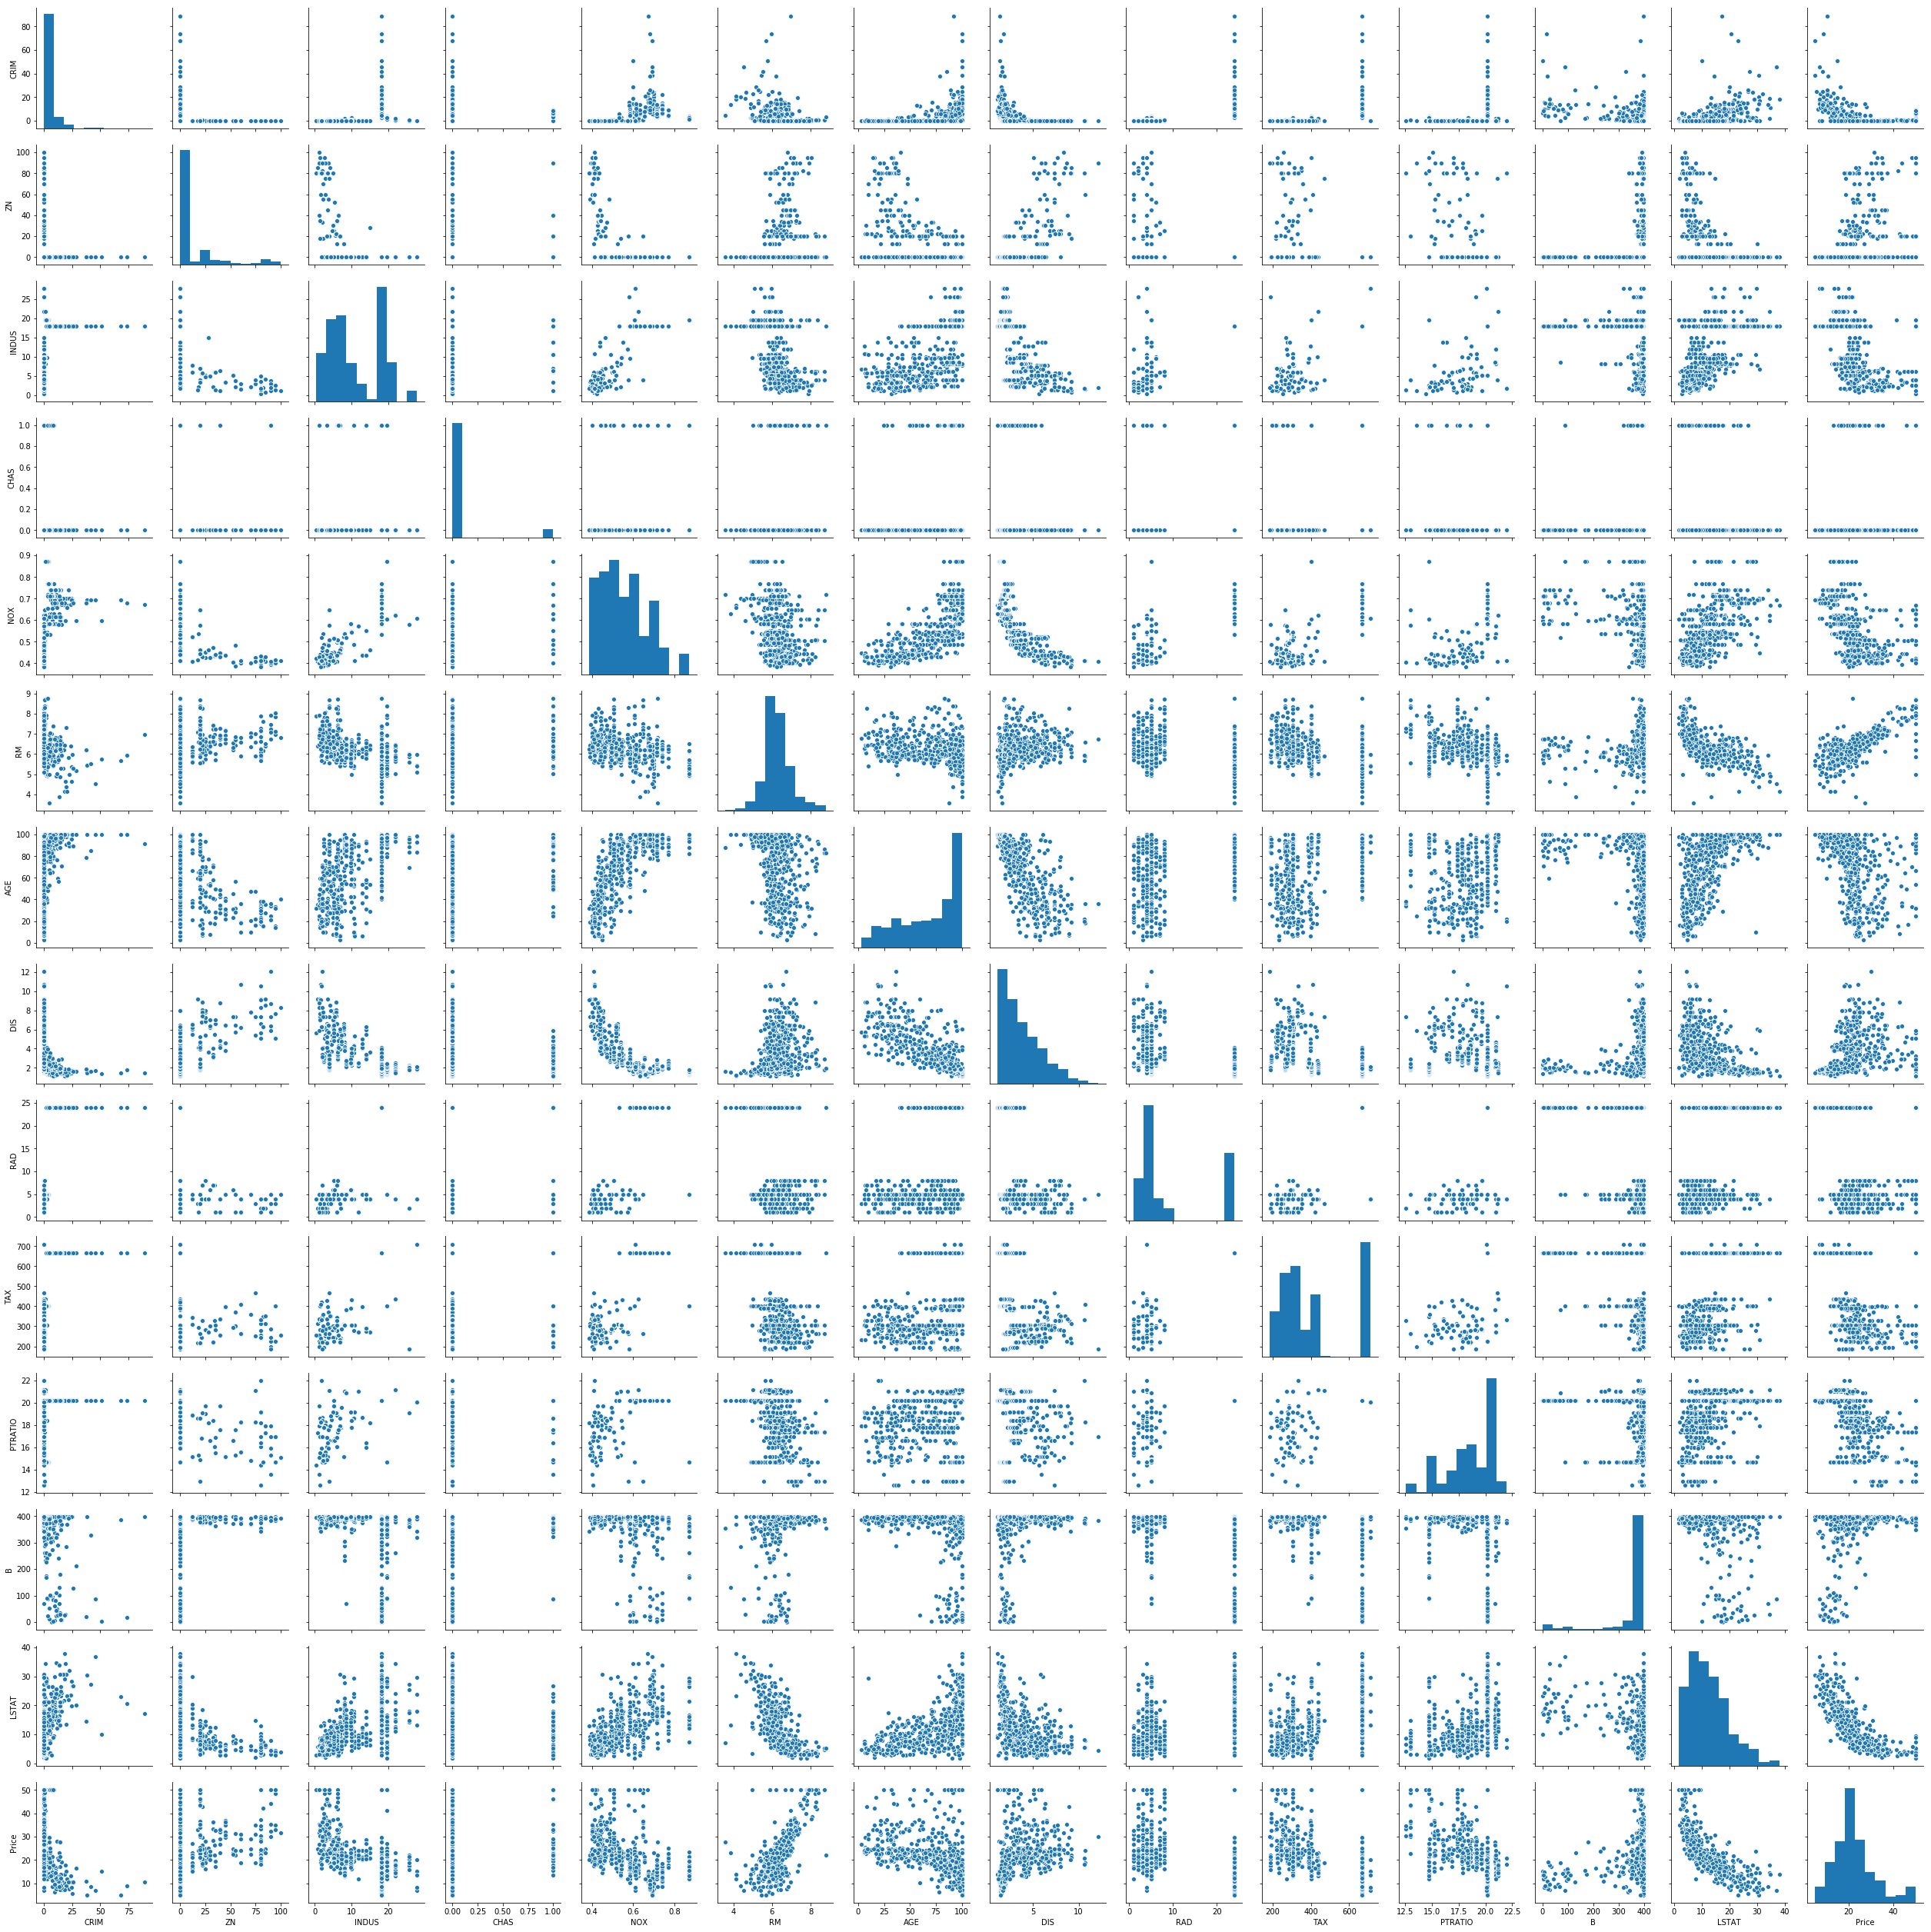

In [18]:
sns.pairplot(bost)

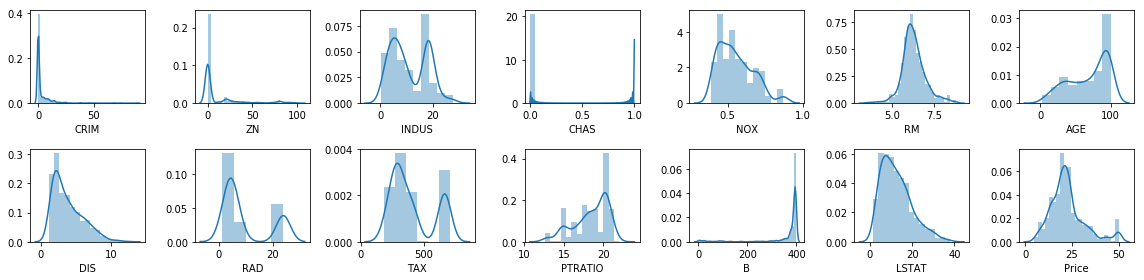

In [19]:
rows = 2
cols = 7

fig, ax = plt.subplots(nrows = rows , ncols = cols , figsize = (16,4))

col = bost.columns
index = 0

for i in range(rows):
    for j in range(cols):
        sns.distplot(bost[col[index]], ax = ax[i][j])
        index +=1 
plt.tight_layout()

We are going to create now a correlation matrix to quantify and summarize the relationships between the variables.

This correlation matrix is closely related witn covariance matrix, in fact it is a rescaled version of the covariance matrix, computed from standardize features.

It is a square matrix (with the same number of columns and rows) that contains the Person’s r correlation coefficient.

In [20]:
corrdat = bost.corr()
corrdat

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,Price
CRIM,1.000000,-0.200469,0.406583,-0.055892,0.420972,-0.219247,0.352734,-0.379670,0.625505,0.582764,0.289946,-0.385064,0.455621,-0.388305
ZN,-0.200469,1.000000,-0.533828,-0.042697,-0.516604,0.311991,-0.569537,0.664408,-0.311948,-0.314563,-0.391679,0.175520,-0.412995,0.360445
INDUS,0.406583,-0.533828,1.000000,0.062938,0.763651,-0.391676,0.644779,-0.708027,0.595129,0.720760,0.383248,-0.356977,0.603800,-0.483725
CHAS,-0.055892,-0.042697,0.062938,1.000000,0.091203,0.091251,0.086518,-0.099176,-0.007368,-0.035587,-0.121515,0.048788,-0.053929,0.175260
NOX,0.420972,-0.516604,0.763651,0.091203,1.000000,-0.302188,0.731470,-0.769230,0.611441,0.668023,0.188933,-0.380051,0.590879,-0.427321
RM,-0.219247,0.311991,-0.391676,0.091251,-0.302188,1.000000,-0.240265,0.205246,-0.209847,-0.292048,-0.355501,0.128069,-0.613808,0.695360
AGE,0.352734,-0.569537,0.644779,0.086518,0.731470,-0.240265,1.000000,-0.747881,0.456022,0.506456,0.261515,-0.273534,0.602339,-0.376955
DIS,-0.379670,0.664408,-0.708027,-0.099176,-0.769230,0.205246,-0.747881,1.000000,-0.494588,-0.534432,-0.232471,0.291512,-0.496996,0.249929
RAD,0.625505,-0.311948,0.595129,-0.007368,0.611441,-0.209847,0.456022,-0.494588,1.000000,0.910228,0.464741,-0.444413,0.488676,-0.381626
TAX,0.582764,-0.314563,0.720760,-0.035587,0.668023,-0.292048,0.506456,-0.534432,0.910228,1.000000,0.460853,-0.441808,0.543993,-0.468536


We will use the heatmap function from the seaborn library to plot the correlation matrix.

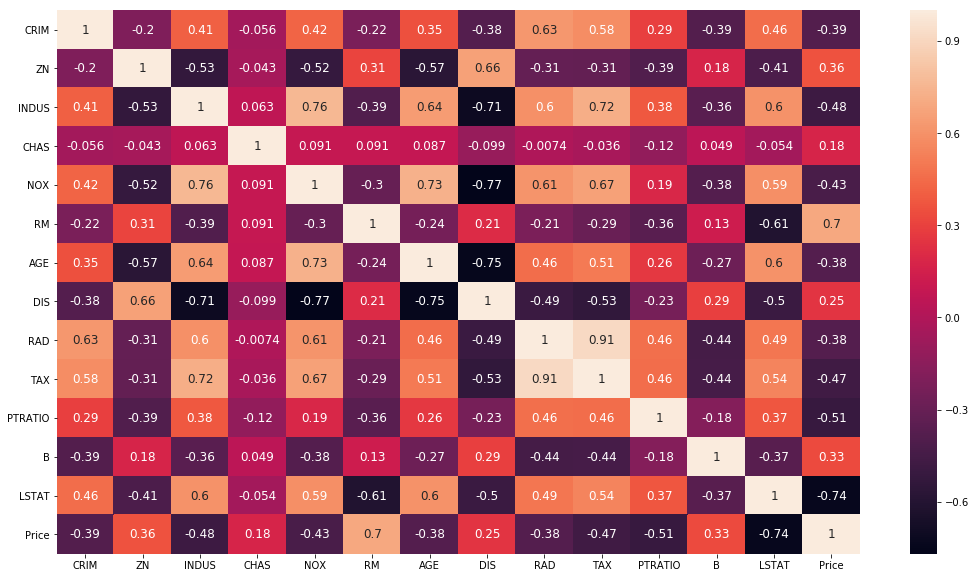

In [21]:
fig , ax = plt.subplots(figsize = (18,10))
sns.heatmap(corrdat , annot = True , annot_kws = {'size':12})

The correlation coefficient ranges from -1 to 1. If the value is close to 1, it means that there is a strong positive correlation between the two variables. When it is close to -1, the variables have a strong negative correlation.



In [22]:
corrdat.index

Index(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX',
       'PTRATIO', 'B', 'LSTAT', 'Price'],
      dtype='object')


To fit a linear regression model, we select those features which have a high correlation with our target variable Price. Below getCorrelatedFeature function is used to find those features by comparing their absolute value of correlated features with threshold. 

In [23]:
def getCorrelatedFeature(Corrdata, threshold):
    feature = []
    value = []
    
    for i , index in enumerate(Corrdata.index):
        if abs(Corrdata[index])>threshold:
            feature.append(index)
            print(index)
            value.append(Corrdata[index])
    df = pd.DataFrame(data = value, index = feature, columns = ['corr value'])
    return df

In [24]:
threshold = 0.4
corr_value = getCorrelatedFeature(corrdat['Price'],threshold)


INDUS
NOX
RM
TAX
PTRATIO
LSTAT
Price


These features found correlating to the target feature Price after passing threshold of 0.40 

In [25]:
corr_value

,corr value
INDUS,-0.483725
NOX,-0.427321
RM,0.695360
TAX,-0.468536
PTRATIO,-0.507787
LSTAT,-0.737663
Price,1.000000


In [26]:
CD = bost[corr_value.index]
CD.head()

,INDUS,NOX,RM,TAX,PTRATIO,LSTAT,Price
0,2.31,0.538,6.575,296.0,15.3,4.98,24.0
1,7.07,0.469,6.421,242.0,17.8,9.14,21.6
2,7.07,0.469,7.185,242.0,17.8,4.03,34.7
3,2.18,0.458,6.998,222.0,18.7,2.94,33.4
4,2.18,0.458,7.147,222.0,18.7,5.33,36.2


## Pairplot and Corrmat of correlated data

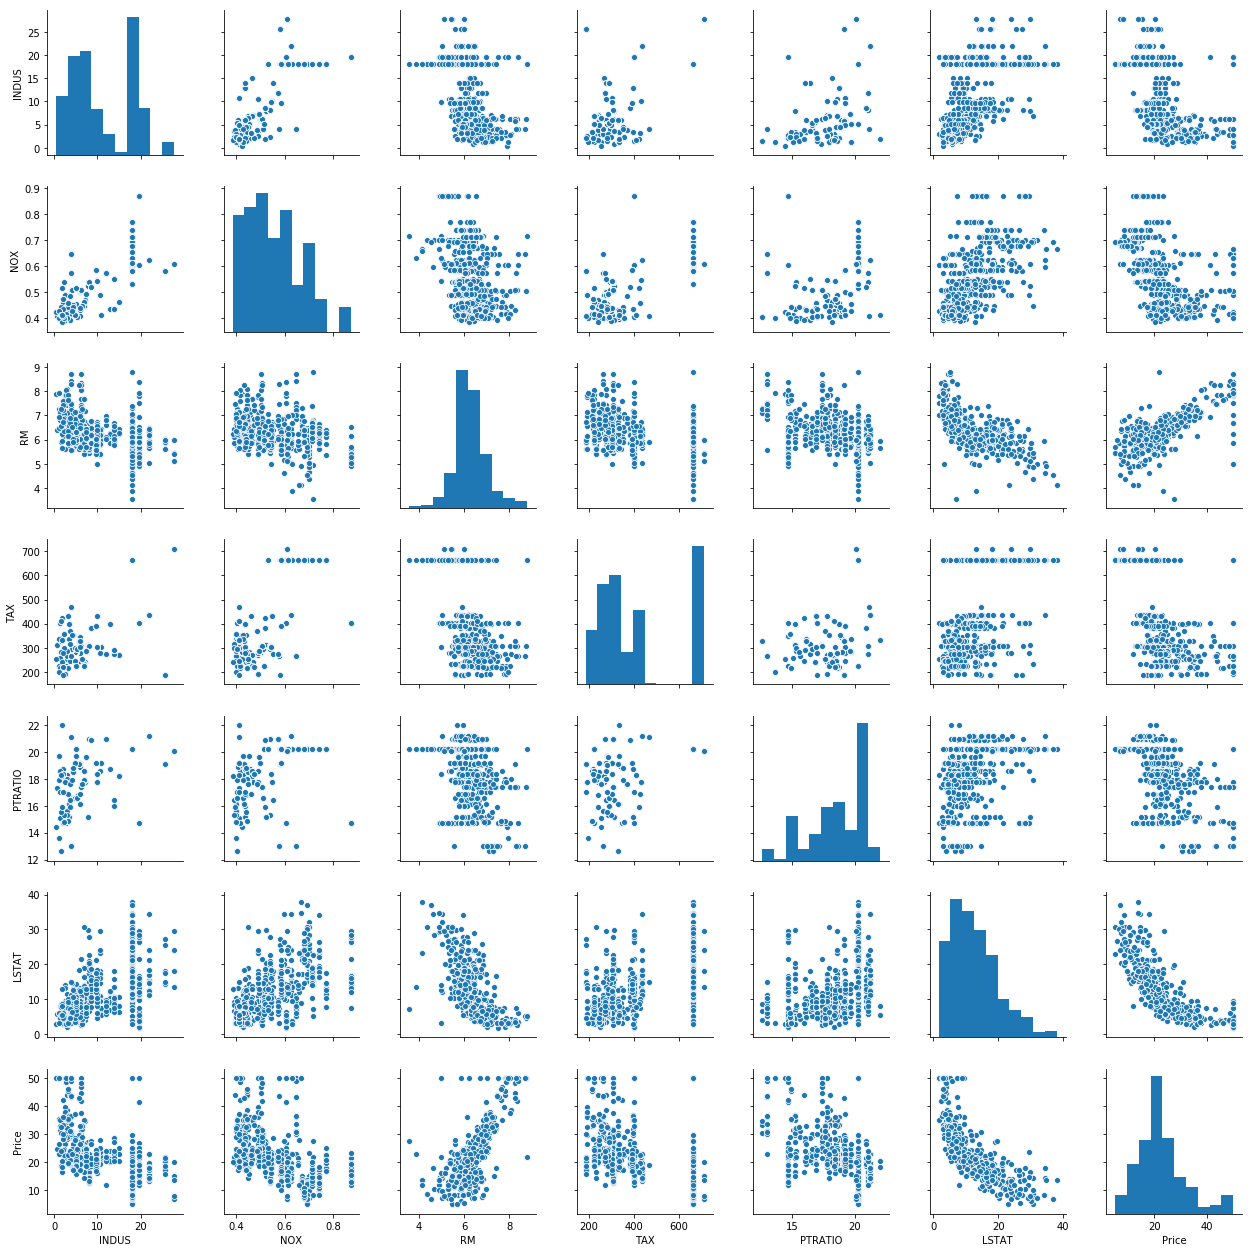

In [27]:
sns.pairplot(CD)
plt.tight_layout()

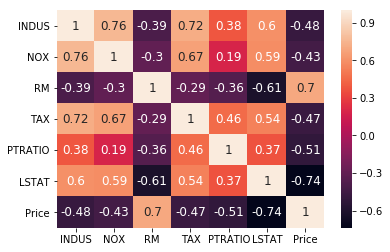

In [28]:
sns.heatmap(CD.corr(),annot =True , annot_kws=  {'size':12})

### Spliting Data

we will take the Boston housing dataset and split the data into training and testing subsets. Typically, the data is also shuffled into a random order when creating the training and testing subsets to remove any bias in the ordering of the dataset.

In [29]:
X = CD.drop(labels = ['Price'], axis = 1)
y = CD['Price']


In [30]:
X.head()

,INDUS,NOX,RM,TAX,PTRATIO,LSTAT
0,2.31,0.538,6.575,296.0,15.3,4.98
1,7.07,0.469,6.421,242.0,17.8,9.14
2,7.07,0.469,7.185,242.0,17.8,4.03
3,2.18,0.458,6.998,222.0,18.7,2.94
4,2.18,0.458,7.147,222.0,18.7,5.33


In [31]:
from sklearn.model_selection import train_test_split

In [32]:
X_train, X_test , y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 0 )

In [33]:
X_train.shape , X_test.shape

((354, 6), (152, 6))

### Lets start traning the model 

In [34]:
from sklearn.linear_model import LinearRegression

In [35]:
model = LinearRegression()

In [36]:
model.fit(X_train , y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [37]:
predict = model.predict(X_test)

In [38]:
predict

array([26.71422354, 21.13718072, 27.06207575, 11.60965356, 22.85988506,
       20.08224437, 18.90225198, 21.33221658, 16.84732466, 21.53574927,
       14.07505467, 17.37742154, 17.06165093,  3.98475065, 39.65886426,
       34.05344396, 21.04876757, 37.92779828, 29.49717309, 22.00886064,
       25.19134522, 25.52243144, 18.47248581, 27.83388037, 22.36670099,
        8.20392803, 17.96151726, 21.71259322, 35.94395107, 19.89339672,
       16.72831908, 17.53315546, 23.22005726, 24.1829816 , 26.99805758,
       16.03028242, 11.02199036, 19.72295488, 17.8122217 , 13.64927299,
       27.72891969, 20.84381541, 24.9387406 , 13.25338358, 27.75499939,
       26.36135549, 22.45244089, 24.01689785, 11.06285636, 23.6574219 ,
       24.17536555, 16.16152369, 22.95062164, 36.09065858, 15.31125751,
       22.84353377, 22.07276291, 20.4514667 , 18.83630206, 19.28953375,
       23.04044685, 22.12874356, 32.66286877, 29.64181806, 16.32968771,
       31.23501214, 18.67059698, 22.707214  , 19.02288342, 22.23

In [39]:
compare1 = pd.DataFrame({"Predicted":predict , "Actual": y_test})

In [40]:
compare1

,Predicted,Actual
329,26.714224,22.6
371,21.137181,50.0
219,27.062076,23.0
403,11.609654,8.3
78,22.859885,21.2
15,20.082244,19.9
487,18.902252,20.6
340,21.332217,18.7
310,16.847325,16.1
102,21.535749,18.6


## Defining performance metrics

It is difficult to measure the quality of a given model without quantifying its performance over training and testing. 
This is typically done using some type of performance metric, whether it is through calculating some type of error, the goodness of fit, or some other useful measurement. 
For this project, you will be calculating the coefficient of determination, R2, to quantify your model's performance. 

The coefficient of determination for a model is a useful statistic in regression analysis, as it often describes how "good" that model is at making predictions.
The values for R2 range from 0 to 1, which captures the percentage of squared correlation between the predicted and actual values of the target variable. 

A model with an R2 of 0 always fails to predict the target variable, whereas a model with an R2 of 1 perfectly predicts the target variable. 
Any value between 0 and 1 indicates what percentage of the target variable, using this model, can be explained by the features. 

A model can be given a negative R2 as well, which indicates that the model is no better than one that naively predicts the mean of the target variable.

For the performance_metric function in the code cell below, you will need to implement the following:
Use r2_score from sklearn.metrics to perform a performance calculation between y_true and y_predict. Assign the performance score to the score variable.


### Regression Evaluation Metrics

Here are three common evaluation metrics for regression problems:

Mean Absolute Error (MAE) is the mean of the absolute value of the errors:

$$\frac 1n\sum_{i=1}^n|y_i-\hat{y}_i|$$
Mean Squared Error (MSE) is the mean of the squared errors:

$$\frac 1n\sum_{i=1}^n(y_i-\hat{y}_i)^2$$
Root Mean Squared Error (RMSE) is the square root of the mean of the squared errors:

$$\sqrt{\frac 1n\sum_{i=1}^n(y_i-\hat{y}_i)^2}$$
Comparing these metrics:

MAE is the easiest to understand, because it's the average error.
MSE is more popular than MAE, because MSE "punishes" larger errors, which tends to be useful in the real world.
RMSE is even more popular than MSE, because RMSE is interpretable in the "y" units.
All of these are loss functions, because we want to minimize them.

In [41]:
from sklearn.metrics import r2_score , mean_absolute_error, mean_squared_error

In [42]:
score = r2_score(y_test, predict)
mae = mean_absolute_error(y_test, predict)
mse = mean_squared_error(y_test, predict)
rmse = np.sqrt(mean_squared_error(y_test, predict))

In [43]:
print("The performance for testing set")
print("-------------------------------")
print('r2_score is', score)
print('MAE is ', mae)
print('MSE is ', mse)
print('RMSE is ',rmse)

The performance for testing set
-------------------------------
r2_score is 0.5923183733172392
MAE is  3.998286311970871
MSE is  33.945815157082414
RMSE is  5.82630373024634


### Thanks